In [223]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [304]:
X = pd.read_csv('train.csv')
X = X.drop(columns=['EmployeeID'])
y = X.pop('Attrition')
X

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EnvironmentSatisfaction,Gender,...,RelationshipSatisfaction,StandardHours,Shift,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,40,Travel_Rarely,1398,Cardiology,2,4,Life Sciences,1,3,Female,...,4,80,0,21,2,3,20,15,1,12
1,40,Travel_Rarely,1300,Maternity,24,2,Technical Degree,1,1,Male,...,1,80,2,9,3,3,9,8,4,7
2,25,Travel_Rarely,622,Cardiology,13,1,Medical,1,2,Male,...,3,80,0,7,1,3,7,4,0,6
3,33,Travel_Rarely,922,Maternity,1,5,Medical,1,1,Female,...,3,80,1,10,2,3,6,1,0,5
4,39,Travel_Frequently,505,Maternity,2,4,Technical Degree,1,3,Female,...,4,80,0,20,1,3,19,6,11,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1335,41,Travel_Rarely,549,Cardiology,7,2,Medical,1,4,Female,...,2,80,0,8,6,3,2,2,2,1
1336,56,Travel_Rarely,1162,Neurology,24,2,Life Sciences,1,1,Male,...,4,80,0,5,3,3,4,2,1,0
1337,29,Travel_Rarely,1328,Maternity,2,3,Life Sciences,1,3,Male,...,4,80,1,6,3,3,5,4,0,4
1338,27,Travel_Rarely,1377,Cardiology,2,3,Life Sciences,1,4,Male,...,1,80,0,5,3,3,5,4,0,4


In [305]:
def Gender(x):
    if x == 'Female':
        return 0
    elif x == 'Male':
        return 1
    else:
        pass
def OverTime(x):
    if x == 'No':
        return 0
    elif x == 'Yes':
        return 1
    else:
        pass

In [306]:
X = X.drop(columns=['StandardHours', 'Over18', 'EmployeeCount'])

bt = pd.get_dummies(X['BusinessTravel'])
dp = pd.get_dummies(X['Department'])
ed = pd.get_dummies(X['EducationField'])
ed = ed.rename(columns={'Other':'OtherEducationField'})
gd = X['Gender'].apply(Gender)
jr = pd.get_dummies(X['JobRole'])
jr = jr.rename(columns={'Other':'OtherJobRole'})
ms = pd.get_dummies(X['MaritalStatus'])
ot = X['OverTime'].apply(OverTime)
X = X.drop(columns=['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'OverTime'])

In [307]:
X = pd.concat([X, bt, dp, ed, gd, jr, ms, ot], axis = 1)

In [308]:
X

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,...,Gender,Admin,Administrative,Nurse,OtherJobRole,Therapist,Divorced,Married,Single,OverTime
0,40,1398,2,4,3,79,3,5,3,18041,...,0,0,1,0,0,0,0,1,0,0
1,40,1300,24,2,1,62,3,2,4,3319,...,1,0,0,0,1,0,1,0,0,0
2,25,622,13,1,2,40,3,1,3,2096,...,1,0,0,0,1,0,0,1,0,0
3,33,922,1,5,1,95,4,4,3,16184,...,0,0,1,0,0,0,1,0,0,0
4,39,505,2,4,3,64,3,3,3,10938,...,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1335,41,549,7,2,4,42,3,2,3,5003,...,0,0,0,0,0,1,0,0,1,0
1336,56,1162,24,2,1,97,3,1,4,2587,...,1,0,0,1,0,0,0,0,1,0
1337,29,1328,2,3,3,76,3,1,2,2703,...,1,0,0,0,1,0,0,1,0,0
1338,27,1377,2,3,4,74,3,2,3,4478,...,1,0,0,1,0,0,0,0,1,1


In [309]:
# Label encoding for categoricals
for colname in X.select_dtypes("O"):
    X[colname], _ = X[colname].factorize()
    
# All discrete features should now have integer dtypes (double-check this before using MI!)
discrete_features = X.dtypes == int

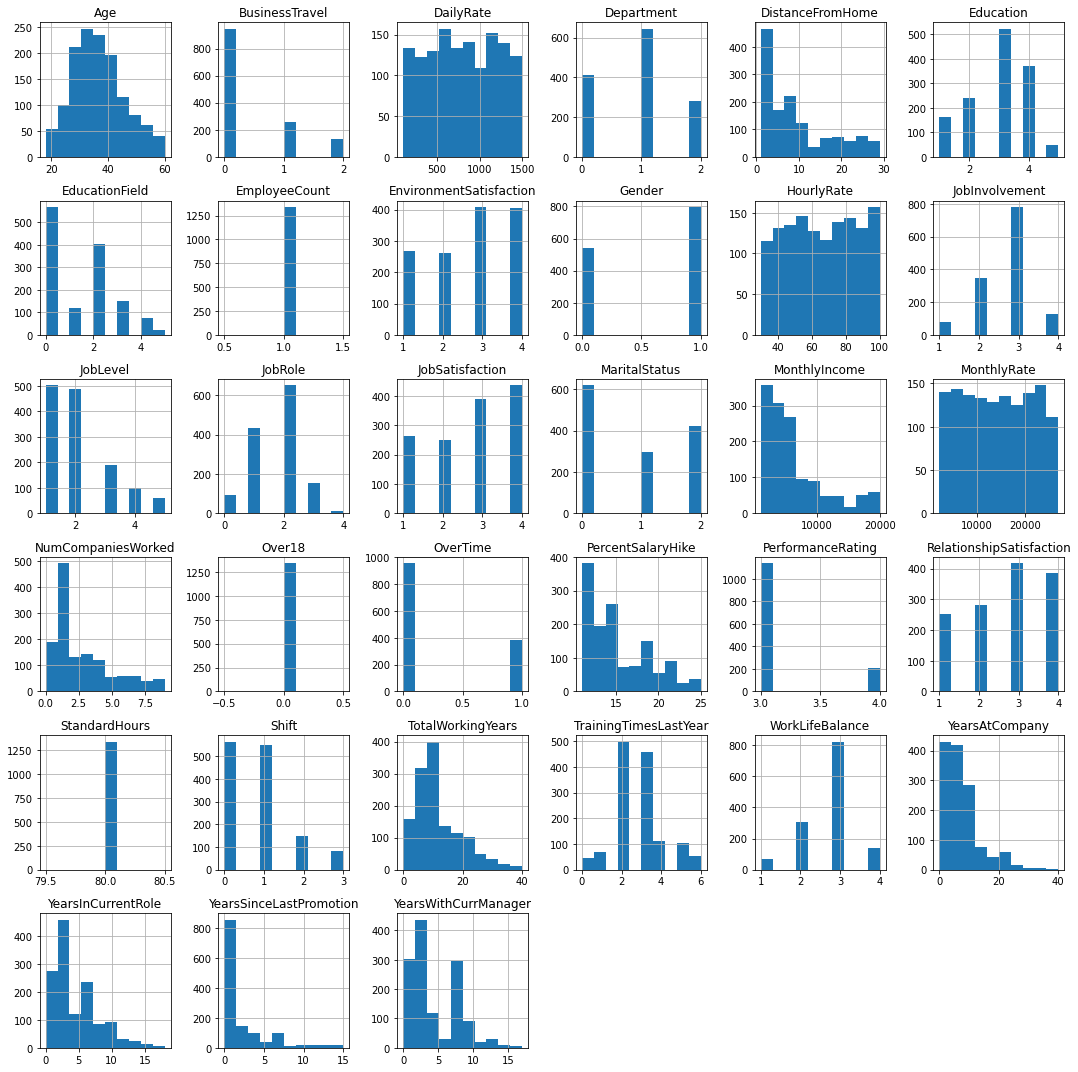

In [291]:
X.hist(figsize=(15,15))
plt.tight_layout()
plt.show()

lasso 
ramdom forest
probit model
post lasso

In [292]:
# Label encoding for categoricals
# X = X.drop(columns=['StandardHours', 'Over18', 'EmployeeCount'])
def y_encor(y):
    if y == 'No':
        return 0
    elif y == 'Yes':
        return 1
    else:
        pass
y_encorder = y.apply(y_encor)
y_encorder

0       0
1       0
2       0
3       0
4       0
       ..
1335    0
1336    1
1337    0
1338    0
1339    0
Name: Attrition, Length: 1340, dtype: int64

In [293]:
from sklearn.feature_selection import mutual_info_classif

def make_mi_scores(X, y_encorder, discrete_features):
    mi_scores = mutual_info_classif(X, y_encorder, discrete_features=discrete_features)
    mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)
    mi_scores = mi_scores.sort_values(ascending=False)
    return mi_scores

discrete_features = X.dtypes == int
mi_scores = make_mi_scores(X, y_encorder, discrete_features)
mi_scores[::]  # show a few features with their MI scores

MonthlyRate                 0.346516
MonthlyIncome               0.336951
DailyRate                   0.251714
Age                         0.066984
TotalWorkingYears           0.060613
YearsAtCompany              0.048536
OverTime                    0.047925
HourlyRate                  0.044244
JobLevel                    0.041740
YearsWithCurrManager        0.037920
YearsInCurrentRole          0.036403
Shift                       0.023629
JobRole                     0.022749
DistanceFromHome            0.020515
MaritalStatus               0.020220
YearsSinceLastPromotion     0.017867
JobInvolvement              0.013868
NumCompaniesWorked          0.010019
EnvironmentSatisfaction     0.008542
TrainingTimesLastYear       0.006810
WorkLifeBalance             0.006344
PercentSalaryHike           0.004769
BusinessTravel              0.004146
Education                   0.003143
JobSatisfaction             0.002998
EducationField              0.002818
Department                  0.002417
R

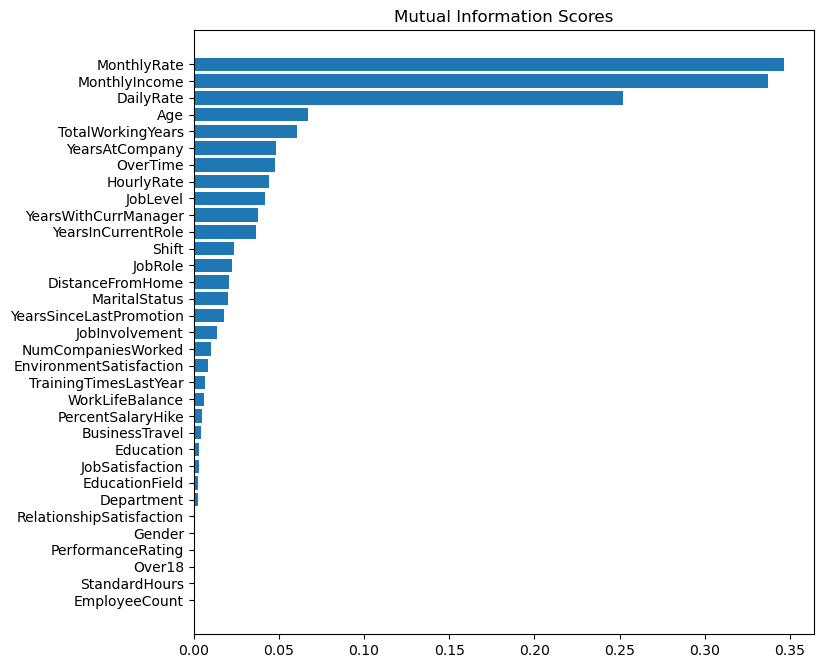

In [294]:
def plot_mi_scores(scores):
    scores = scores.sort_values(ascending=True)
    width = np.arange(len(scores))
    ticks = list(scores.index)
    plt.barh(width, scores)
    plt.yticks(width, ticks)
    plt.title("Mutual Information Scores")


plt.figure(dpi=100, figsize=(8, 8))
plot_mi_scores(mi_scores)

In [256]:
X = X.drop(columns=['Cardiology', 'Married', 'Therapist', 'Non-Travel', 'Technical Degree', 'Travel_Rarely', \
                    'Medical', 'Life Sciences', 'Human Resources', 'PerformanceRating', 'Gender', 'RelationshipSatisfaction'])

In [296]:
X = X.drop(columns=['StandardHours', 'Over18', 'EmployeeCount','PerformanceRating', 'Gender', 'RelationshipSatisfaction'])

In [297]:
X

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,HourlyRate,JobInvolvement,...,OverTime,PercentSalaryHike,Shift,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,40,0,1398,0,2,4,0,3,79,3,...,0,14,0,21,2,3,20,15,1,12
1,40,0,1300,1,24,2,1,1,62,3,...,0,17,2,9,3,3,9,8,4,7
2,25,0,622,0,13,1,2,2,40,3,...,0,11,0,7,1,3,7,4,0,6
3,33,0,922,1,1,5,2,1,95,4,...,0,19,1,10,2,3,6,1,0,5
4,39,1,505,1,2,4,1,3,64,3,...,0,25,0,20,1,3,19,6,11,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1335,41,0,549,0,7,2,2,4,42,3,...,0,14,0,8,6,3,2,2,2,1
1336,56,0,1162,2,24,2,0,1,97,3,...,0,16,0,5,3,3,4,2,1,0
1337,29,0,1328,1,2,3,0,3,76,3,...,0,23,1,6,3,3,5,4,0,4
1338,27,0,1377,0,2,3,0,4,74,3,...,1,11,0,5,3,3,5,4,0,4


In [75]:
from sklearn.metrics import confusion_matrix
from sklearn import datasets
from sklearn.metrics import accuracy_score

In [310]:
X_all = X.copy()
X_all['Attrition'] = y_encorder
X_all

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,...,Admin,Administrative,Nurse,OtherJobRole,Therapist,Divorced,Married,Single,OverTime,Attrition
0,40,1398,2,4,3,79,3,5,3,18041,...,0,1,0,0,0,0,1,0,0,0
1,40,1300,24,2,1,62,3,2,4,3319,...,0,0,0,1,0,1,0,0,0,0
2,25,622,13,1,2,40,3,1,3,2096,...,0,0,0,1,0,0,1,0,0,0
3,33,922,1,5,1,95,4,4,3,16184,...,0,1,0,0,0,1,0,0,0,0
4,39,505,2,4,3,64,3,3,3,10938,...,0,0,0,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1335,41,549,7,2,4,42,3,2,3,5003,...,0,0,0,0,1,0,0,1,0,0
1336,56,1162,24,2,1,97,3,1,4,2587,...,0,0,1,0,0,0,0,1,0,1
1337,29,1328,2,3,3,76,3,1,2,2703,...,0,0,0,1,0,0,1,0,0,0
1338,27,1377,2,3,4,74,3,2,3,4478,...,0,0,1,0,0,0,0,1,1,0


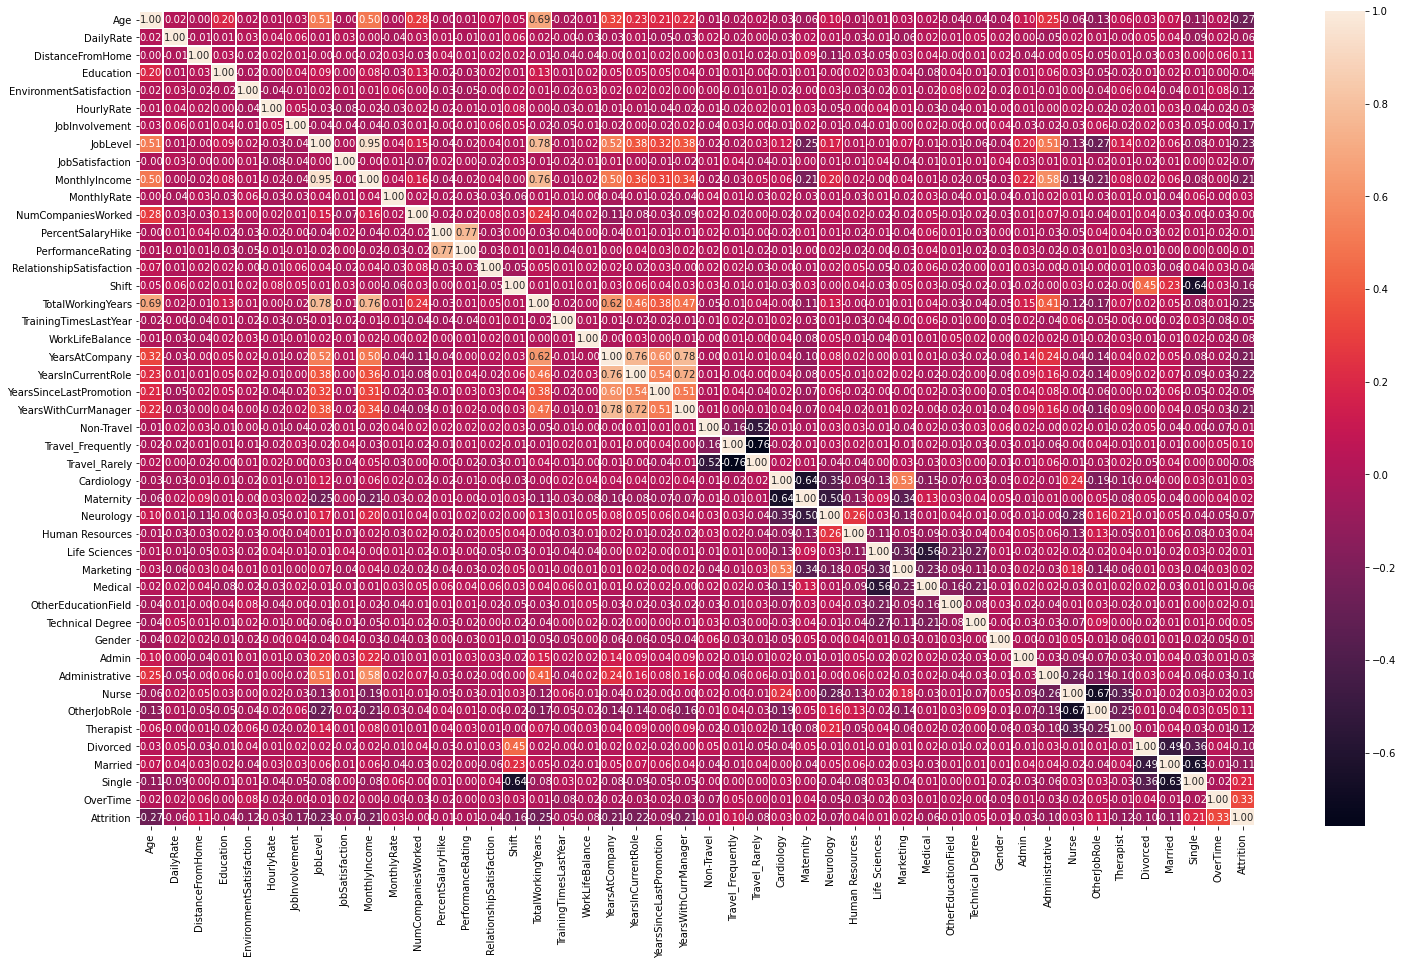

In [312]:

corr_matrix = X_all.corr()
fig,ax=plt.subplots(figsize=(25,15))
ax=sns.heatmap(corr_matrix,
               annot=True,
               linewidths=0.5,
               fmt=".2f"
              )

In [225]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

In [153]:
lr=LogisticRegression(C = 0.1, random_state = 42, solver = 'liblinear')
dt=DecisionTreeClassifier()
rm=RandomForestClassifier()
gnb=GaussianNB()
knn = KNeighborsClassifier(n_neighbors=3)
svm = SVC(kernel='linear')

In [96]:
for a,b in zip([lr,dt,knn,svm,rm,gnb],["Logistic Regression","Decision Tree","KNN","SVM","Random Forest","Naive Bayes"]):
    a.fit(X,y_encorder)
    prediction=a.predict(X)
    #y_pred=a.predict(X_test)
    score1=accuracy_score(y_encorder,prediction)
    #score=accuracy_score(y_test,y_pred)
    msg1="[%s] training data accuracy is : %f" % (b,score1)
    #msg2="[%s] test data accuracy is : %f" % (b,score)
    print(msg1)
    #print(msg2)

[Logistic Regression] training data accuracy is : 0.927612
[Decision Tree] training data accuracy is : 0.997015
[KNN] training data accuracy is : 0.915672
[SVM] training data accuracy is : 0.908209
[Random Forest] training data accuracy is : 0.997015
[Naive Bayes] training data accuracy is : 0.737313


In [97]:
model_scores={'Logistic Regression':lr.score(X,y_encorder),
             'KNN classifier':knn.score(X,y_encorder),
             'Support Vector Machine':svm.score(X,y_encorder),
             'Random forest':rm.score(X,y_encorder),
              'Decision tree':dt.score(X,y_encorder),
              'Naive Bayes':gnb.score(X,y_encorder)
             }
model_scores

{'Logistic Regression': 0.9276119402985075,
 'KNN classifier': 0.9156716417910448,
 'Support Vector Machine': 0.9082089552238806,
 'Random forest': 0.9970149253731343,
 'Decision tree': 0.9970149253731343,
 'Naive Bayes': 0.7373134328358208}

In [229]:
X_test = pd.read_csv('test.csv')
# X_test = X_test.drop(columns=['EmployeeID', 'StandardHours', 'Over18', 'EmployeeCount'])
# for colname in X_test.select_dtypes("O"):
#     X_test[colname], _ = X_test[colname].factorize()

X_test = X_test.drop(columns=['EmployeeID', 'StandardHours', 'Over18', 'EmployeeCount'])

bt = pd.get_dummies(X_test['BusinessTravel'])
dp = pd.get_dummies(X_test['Department'])
ed = pd.get_dummies(X_test['EducationField'])
ed = ed.rename(columns={'Other':'OtherEducationField'})
gd = X_test['Gender'].apply(Gender)
jr = pd.get_dummies(X_test['JobRole'])
jr = jr.rename(columns={'Other':'OtherJobRole'})
ms = pd.get_dummies(X_test['MaritalStatus'])
ot = X_test['OverTime'].apply(OverTime)
X_test = X_test.drop(columns=['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'OverTime'])
X_test = pd.concat([X_test, bt, dp, ed, gd, jr, ms, ot], axis = 1)

X_test = X_test.drop(columns=['Cardiology', 'Married', 'Therapist', 'Non-Travel', 'Technical Degree', 'Travel_Rarely', \
                    'Medical', 'Life Sciences', 'Human Resources', 'PerformanceRating', 'Gender', 'RelationshipSatisfaction'])
X_test

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,...,Neurology,Marketing,OtherEducationField,Admin,Administrative,Nurse,OtherJobRole,Divorced,Single,OverTime
0,42,855,12,3,2,57,3,1,2,2766,...,0,0,0,0,0,1,0,1,0,0
1,29,906,10,3,4,92,2,1,1,2404,...,0,0,0,0,0,0,1,0,1,1
2,38,1327,2,2,4,39,2,2,4,5249,...,0,0,0,0,0,1,0,0,0,0
3,25,240,5,3,3,46,2,2,3,5744,...,0,1,0,0,0,1,0,0,1,1
4,29,352,6,1,4,87,2,1,2,2804,...,1,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
331,59,715,2,3,3,69,2,4,4,13726,...,1,0,0,0,0,0,0,0,1,1
332,42,265,5,2,4,90,3,5,3,18303,...,0,1,0,0,1,0,0,0,0,0
333,29,1090,10,3,4,83,3,1,2,2297,...,0,1,0,0,0,0,1,1,0,0
334,34,1381,4,4,3,72,3,2,3,6538,...,0,1,0,0,0,1,0,0,0,0


In [142]:
y_pred=lr.predict(X_test)

In [121]:
id = range(0,len(y_pred))
y_test = pd.DataFrame()
y_test['Id'] = id
y_test['Predicted'] = y_pred
y_test.to_csv('pred_lr.csv', index = 0)

In [298]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV

# Data Normalization
scaler = MinMaxScaler(feature_range = (0,1))
scaler.fit(X)

X_train = scaler.transform(X)


# Defining parameters for hyper-parameter tuning
params = {
        'solver': ['newton-cg', 'liblinear'],
        'penalty': ['l2'],
        'C': np.logspace(-4.5,4.5,50),
        'class_weight':['balanced'],
        'tol':[0.0001, 0.001, 0.01, 0.1],
        'fit_intercept':[True, False],
        'intercept_scaling':[1, 2, 3]
}

# Initializing Grid Search with Logistic Regression and keeping roc_auc as the performance metrics!
grid_search = GridSearchCV(estimator = LogisticRegression(),
                           param_grid=params,
                           cv = 5,
                           n_jobs=-1,
                           verbose=0,
                           scoring="f1",
                           return_train_score=True)

# Training
grid_search.fit(X_train, y_encorder)

# Best Performing Parameter
print('='*20)
print("best params: " + str(grid_search.best_estimator_))
print("best params: " + str(grid_search.best_params_))
print('best score:', grid_search.best_score_)
print('='*20)

best params: LogisticRegression(C=0.00026203985288583486, class_weight='balanced',
                   fit_intercept=False, solver='newton-cg')
best params: {'C': 0.00026203985288583486, 'class_weight': 'balanced', 'fit_intercept': False, 'intercept_scaling': 1, 'penalty': 'l2', 'solver': 'newton-cg', 'tol': 0.0001}
best score: 0.6418565094650229


In [301]:
X_test = pd.read_csv('test.csv')
X_test = X_test.drop(columns=['EmployeeID', 'StandardHours', 'Over18', 'EmployeeCount', 'PerformanceRating', 'Gender', 'RelationshipSatisfaction'])
for colname in X_test.select_dtypes("O"):
    X_test[colname], _ = X_test[colname].factorize()

# X_test = X_test.drop(columns=['EmployeeID', 'StandardHours', 'Over18', 'EmployeeCount','PerformanceRating', 'Gender', 'RelationshipSatisfaction'])

# bt = pd.get_dummies(X_test['BusinessTravel'])
# dp = pd.get_dummies(X_test['Department'])
# ed = pd.get_dummies(X_test['EducationField'])
# ed = ed.rename(columns={'Other':'OtherEducationField'})
# gd = X_test['Gender'].apply(Gender)
# jr = pd.get_dummies(X_test['JobRole'])
# jr = jr.rename(columns={'Other':'OtherJobRole'})
# ms = pd.get_dummies(X_test['MaritalStatus'])
# ot = X_test['OverTime'].apply(OverTime)
# X_test = X_test.drop(columns=['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'OverTime'])
# X_test = pd.concat([X_test, bt, dp, ed, gd, jr, ms, ot], axis = 1)

# # X_test = X_test.drop(columns=['Cardiology', 'Married', 'Therapist', 'Non-Travel', 'Technical Degree', 'Travel_Rarely', \
# #                     'Medical', 'Life Sciences', 'Human Resources', 'PerformanceRating', 'Gender', 'RelationshipSatisfaction'])

scaler = MinMaxScaler(feature_range = (0,1))
scaler.fit(X_test)

X_test_scaler = scaler.transform(X_test)
y_pred = grid_search.predict(X_test_scaler)

In [302]:
id = range(0,len(y_pred))
y_test = pd.DataFrame()
y_test['Id'] = id
y_test['Predicted'] = y_pred
y_test.to_csv('pred_lr_best_onehot.csv', index = 0)

In [149]:
X

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,...,PerformanceRating,RelationshipSatisfaction,Shift,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,40,0,1398,0,2,4,0,3,0,79,...,3,4,0,21,2,3,20,15,1,12
1,40,0,1300,1,24,2,1,1,1,62,...,3,1,2,9,3,3,9,8,4,7
2,25,0,622,0,13,1,2,2,1,40,...,3,3,0,7,1,3,7,4,0,6
3,33,0,922,1,1,5,2,1,0,95,...,3,3,1,10,2,3,6,1,0,5
4,39,1,505,1,2,4,1,3,0,64,...,4,4,0,20,1,3,19,6,11,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1335,41,0,549,0,7,2,2,4,0,42,...,3,2,0,8,6,3,2,2,2,1
1336,56,0,1162,2,24,2,0,1,1,97,...,3,4,0,5,3,3,4,2,1,0
1337,29,0,1328,1,2,3,0,3,1,76,...,4,4,1,6,3,3,5,4,0,4
1338,27,0,1377,0,2,3,0,4,1,74,...,3,1,0,5,3,3,5,4,0,4


In [263]:
# Data Normalization
scaler = MinMaxScaler(feature_range = (0,1))
scaler.fit(X)

X_train = scaler.transform(X)


# Defining parameters for hyper-parameter tuning
params = {'C': np.logspace(-4.5,4.5,50), 
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['linear', 'poly', 'rbf', 'sigmoid']} 
  

# Initializing Grid Search with Logistic Regression and keeping roc_auc as the performance metrics!
grid_search = GridSearchCV(estimator = SVC(),
                           param_grid=params,
                           cv = 5,
                           n_jobs=-1,
                           verbose=0,
                           scoring="f1",
                           return_train_score=True)

# Training
grid_search.fit(X_train, y_encorder)

# Best Performing Parameter
print('='*20)
print("best params: " + str(grid_search.best_estimator_))
print("best params: " + str(grid_search.best_params_))
print('best score:', grid_search.best_score_)
print('='*20)

best params: SVC(C=15.627069765469964, gamma=1, kernel='linear')
best params: {'C': 15.627069765469964, 'gamma': 1, 'kernel': 'linear'}
best score: 0.7125201893622946


In [269]:
X_test = pd.read_csv('test.csv')
# X_test = X_test.drop(columns=['EmployeeID', 'StandardHours', 'Over18', 'EmployeeCount'])
# for colname in X_test.select_dtypes("O"):
#     X_test[colname], _ = X_test[colname].factorize()

X_test = X_test.drop(columns=['EmployeeID', 'StandardHours', 'Over18', 'EmployeeCount'])

bt = pd.get_dummies(X_test['BusinessTravel'])
dp = pd.get_dummies(X_test['Department'])
ed = pd.get_dummies(X_test['EducationField'])
ed = ed.rename(columns={'Other':'OtherEducationField'})
gd = X_test['Gender'].apply(Gender)
jr = pd.get_dummies(X_test['JobRole'])
jr = jr.rename(columns={'Other':'OtherJobRole'})
ms = pd.get_dummies(X_test['MaritalStatus'])
ot = X_test['OverTime'].apply(OverTime)
X_test = X_test.drop(columns=['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'OverTime'])
X_test = pd.concat([X_test, bt, dp, ed, gd, jr, ms, ot], axis = 1)

X_test = X_test.drop(columns=['Cardiology', 'Married', 'Therapist', 'Non-Travel', 'Technical Degree', 'Travel_Rarely', \
                    'Medical', 'Life Sciences', 'Human Resources', 'PerformanceRating', 'Gender', 'RelationshipSatisfaction'])

scaler = MinMaxScaler(feature_range = (0,1))
scaler.fit(X_test)

X_test_scaler = scaler.transform(X_test)
y_pred = grid_search.predict(X_test_scaler)

In [271]:
id = range(0,len(y_pred))
y_test = pd.DataFrame()
y_test['Id'] = id
y_test['Predicted'] = y_pred
y_test.to_csv('pred_svm_best_onehot.csv', index = 0)

In [270]:
y_pred

array([0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,